# **LIBRARY & DRIVE MOUNT**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import torch
import math
import os
import glob
import random

In [ ]:
!pip install pickle5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp310-cp310-linux_x86_64.whl size=256387 sha256=2ad0c853ba923e66656fb2e30d788e29accdd4981751ac436d4bbd1e1b565f3a
  Stored in directory: /root/.cache/pip/wheels/7d/14/ef/4aab19d27fa8e58772be5c71c16add0426acf9e1f64353235c
Successfully built pickle5


In [ ]:
import pickle
with open(os.path.join(data_dir, 'cifar10_150sp_%s.pkl' % split), 'rb') as f:
                self.labels, self.sp_data = pickle.load(f)
                self.graph_labels = torch.LongTensor(self.labels)

In [ ]:
# !unzip "/content/drive/MyDrive/Saigonmec/original_data/VOC_format_sgm_mgdata_8bit.zip" -d "/content/drive/MyDrive/Saigonmec/original_data"

# **Cleaning csv file before preparing labels**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Saigonmec/original_data/train_annotation.csv')
df[df['ymin'] <= -1]
# df[df['image'] == '2209010987_20221026_MLO_L_4.png']

,image,xmin,ymin,xmax,ymax,label
908,220066114$$$132952_20221202_MLO_R_4.png,1216,-1,1662,1025,benign
1010,220067797_20221209_MLO_L_4.png,7,-1,764,1434,benign


In [ ]:
#xmin scale to 0
df['xmin'] = df['xmin'].replace([-1], 0)
df['xmin'] = df['xmin'].replace([-2], 0)
#xmin scale to 0
df['ymin'] = df['ymin'].replace([-1], 0)

df['xmax'] = df['xmax'].replace([1665], 1664)
df['xmax'] = df['xmax'].replace([-1], 0)
df['ymax'] = df['ymax'].replace([-1], 0)

In [ ]:
print('min xmin:',min(df['xmin']))
print('min xmax:',min(df['xmax']))
print('min ymin:',min(df['ymin']))
print('min ymax:',min(df['ymax']))

print('max xmin:',max(df['xmin']))
print('max xmax:',max(df['xmax']))
print('max ymin:',max(df['ymin']))
print('max ymax:',max(df['ymax']))

min xmin: 0
min xmax: 5
min ymin: 0
min ymax: 111
max xmin: 1651
max xmax: 1664
max ymin: 1762
max ymax: 1905


In [ ]:
list_name = []
for i in df['image']:
  list_name.append(i)
set_name = set(list_name)
list_name_unique = list(set_name)
print(len(list_name_unique))
print(list_name_unique[0])

original_image_path = '/content/drive/MyDrive/Saigonmec/original_data/train/'
list_images = glob.glob('/content/drive/MyDrive/Saigonmec/original_data/train/*')
counter = 0
missing_values = []
for i in list_name_unique:
  file_path = str(original_image_path + i)
  if file_path not in list_images:
    missing_values.append(i)
print(len(missing_values))


1739
2210008196_20221021_CC_L_5.png
19


In [ ]:
df1 = df[~df['image'].isin(missing_values)]

In [ ]:
df1.to_csv('/content/drive/MyDrive/Saigonmec/original_data/cleaned_original.csv')

## **Yolo format Preparation**

In [ ]:
df_yolo = pd.read_csv('/content/drive/MyDrive/Saigonmec/original_data/cleaned_original.csv')

In [ ]:
df_yolo

,Unnamed: 0,image,xmin,ymin,xmax,ymax,label
0,2,10006732_20220608_MLO_R_2.png,750,944,1296,1439,mass
1,3,10006732_20220608_MLO_L_3.png,686,1046,791,1166,microcalcification
2,4,10006732_20220608_CC_R_0.png,828,798,1373,1382,mass
3,5,10006732_20220608_CC_L_1.png,424,921,520,1050,microcalcification
4,6,10006732_20220608_CC_L_1.png,709,999,720,1013,benign
...,...,...,...,...,...,...,...
2835,2874,2211012951_20221208_MLO_L_4.png,98,968,381,1181,microcalcification
2836,2875,2211012951_20221208_MLO_L_4.png,21,137,222,461,lymph_node
2837,2876,2211012951_20221208_CC_L_7.png,105,786,501,1166,mass
2838,2877,2211012951_20221208_CC_L_7.png,122,904,441,1100,microcalcification


In [ ]:
df_yolo[df_yolo['image'] == '2211009297_20221206_MLO_R_5.png']

,Unnamed: 0,image,xmin,ymin,xmax,ymax,label
2788,2822,2211009297_20221206_MLO_R_5.png,1339,1029,1447,1196,microcalcification
2789,2823,2211009297_20221206_MLO_R_5.png,1291,956,1486,1244,mass


In [ ]:
df_yolo['label'].value_counts()

benign                      1181
mass                         874
microcalcification           355
asymmetry                    247
lymph_node                   163
architectural_distorsion      20
Name: label, dtype: int64

In [ ]:
print(len(df_yolo['label']))

2840


# **CROP BOUNDING BOXES OF FINDINGS BASED ON YOLO FORMAT COORDINATES**

In [ ]:
import cv2
original_image_path = '/content/drive/MyDrive/Saigonmec/original_data/train/'
duplicate_list = []
for i in range(len(df_yolo['label'])):
  img_name = original_image_path + df_yolo['image'][i]
  print(img_name)
  class_label = df_yolo['label'][i]
  img = cv2.imread(img_name)
  img_crop = img[df_yolo['ymin'][i]:df_yolo['ymax'][i], df_yolo['xmin'][i]:df_yolo['xmax'][i]]
  area = (df_yolo['ymax'][i] - df_yolo['ymin'][i]) * (df_yolo['xmax'][i] - df_yolo['xmin'][i])
  j = 0
  if str(class_label) == 'mass':
    object_file_name = f"/content/drive/MyDrive/Saigonmec/original_patches/mass/{area}_{j}_{class_label}_{df_yolo['image'][i].split('/')[-1]}"
    cv2.imwrite(object_file_name, img_crop)
  elif str(class_label) == 'microcalcification':
    object_file_name = f"/content/drive/MyDrive/Saigonmec/original_patches/microcalcification/{area}_{j}_{class_label}__{df_yolo['image'][i].split('/')[-1]}"
    cv2.imwrite(object_file_name, img_crop)
  elif str(class_label) == 'lymph_node':
    object_file_name = f"/content/drive/MyDrive/Saigonmec/original_patches/lymph_node/{area}_{j}_{class_label}_{df_yolo['image'][i].split('/')[-1]}"
    cv2.imwrite(object_file_name, img_crop)
  elif str(class_label) == 'benign':
    object_file_name = f"/content/drive/MyDrive/Saigonmec/original_patches/benign/{area}_{j}_{class_label}_{df_yolo['image'][i].split('/')[-1]}"
    while object_file_name in duplicate_list:
      print('Duplicated image: {}'.format(object_file_name))
      j += 1
      object_file_name = f"/content/drive/MyDrive/Saigonmec/original_patches/benign/{area}_{j}_{class_label}_{df_yolo['image'][i].split('/')[-1]}"
    cv2.imwrite(object_file_name, img_crop)
  elif str(class_label) == 'asymmetry':
    object_file_name = f"/content/drive/MyDrive/Saigonmec/original_patches/asymmetry/{area}_{j}_{class_label}_{df_yolo['image'][i].split('/')[-1]}"
    cv2.imwrite(object_file_name, img_crop)
  elif str(class_label) == 'architectural_distorsion':
    object_file_name = f"/content/drive/MyDrive/Saigonmec/original_patches/architectural_distorsion/{area}_{j}_{class_label}_{df_yolo['image'][i].split('/')[-1]}"
    cv2.imwrite(object_file_name, img_crop)
  duplicate_list.append(object_file_name)

In [ ]:
import glob
print('Mass:', len(glob.glob('/content/drive/MyDrive/Saigonmec/original_patches/mass/*')))
print('asymmetry:', len(glob.glob('/content/drive/MyDrive/Saigonmec/original_patches/asymmetry/*')))
print('architectural_distorsion:', len(glob.glob('/content/drive/MyDrive/Saigonmec/original_patches/architectural_distorsion/*')))
print('benign:', len(glob.glob('/content/drive/MyDrive/Saigonmec/original_patches/benign/*')))
print('lymph_node:', len(glob.glob('/content/drive/MyDrive/Saigonmec/original_patches/lymph_node/*')))
print('microcalcification:', len(glob.glob('/content/drive/MyDrive/Saigonmec/original_patches/microcalcification/*')))

Mass: 874
asymmetry: 247
architectural_distorsion: 20
benign: 1181
lymph_node: 163
microcalcification: 355


# **Getting Overlapping Area Findings**

In [ ]:
for i in df_yolo:
  if df_yolo['image'] != 
df_yolo_overlapped = df_yolo[df_yolo]

## **(Optional) Encoding label**

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_yolo['label']= label_encoder.fit_transform(df_yolo['label'])

In [ ]:
df_yolo['label'].value_counts()

2    1181
4     874
5     355
1     247
3     163
0      20
Name: label, dtype: int64

## **YoloV5 for getting subset of finding samples**

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!pip install -r requirements.txt  # install

In [ ]:
import glob
list_images = glob.glob('/content/drive/MyDrive/Saigonmec/original_data/train/*')
list_train_labels = glob.glob('/content/drive/MyDrive/Saigonmec/train/labels/*')
list_valid_labels = glob.glob('/content/drive/MyDrive/Saigonmec/valid/labels/*')
list_test_labels = glob.glob('/content/drive/MyDrive/Saigonmec/test/labels/*')

In [ ]:
print(len(list_images))
print(len(list_train_labels))
print(len(list_valid_labels))
print(len(list_test_labels))


1720
2418
172
172


In [ ]:
print(list_images[0])

/content/drive/MyDrive/Saigonmec/original_data/train/2203001842_20220308_CC_R_0.png


In [ ]:
import cv2
import numpy as np

for i in range(len(list_images)):
  img = cv2.imread(list_images[i])

  # Parse the YOLO.txt file and extract bounding box coordinates
  with open(list_labels[i], "r") as f:
      for line in f:
          data = line.strip().split()
          class_label = data[0]
          # confidence_score = float(data[1])
          x_center, y_center, width, height = map(float, data[1:])
          
          # Convert YOLO format to pixel coordinates
          x_min = int((x_center - width/2) * img.shape[1])
          y_min = int((y_center - height/2) * img.shape[0])
          x_max = int((x_center + width/2) * img.shape[1])
          y_max = int((y_center + height/2) * img.shape[0])
          
          # Extract image from bounding box area
          object_img = img[y_min:y_max, x_min:x_max]
          
          # Save object image to disk
          object_file_name = f"/content/drive/MyDrive/Saigonmec/cropped/{class_label}_{list_images[i].split('/')[-1]}"
          cv2.imwrite(object_file_name, object_img)

# **EDA on subset of finding images**

In [ ]:
# import required module
list_bbox = glob.glob('/content/drive/MyDrive/Saigonmec/original_patches/mass/*')
from PIL import Image
height_list = []
width_list = []
for i in list_bbox:
  img = Image.open(i)
  # get width and height
  width = img.width
  height = img.height
  # Add to list
  height_list.append(height)
  width_list.append(width)

In [ ]:
print(len(list_bbox))

874


In [ ]:
print(height_list)
print(width_list)

[495, 584, 949, 924, 339, 350, 202, 145, 873, 800, 338, 341, 356, 384, 149, 124, 315, 324, 102, 88, 89, 268, 314, 313, 401, 646, 769, 75, 69, 215, 184, 217, 242, 238, 88, 438, 478, 84, 461, 605, 711, 109, 109, 145, 372, 430, 307, 278, 319, 209, 247, 376, 674, 613, 329, 296, 325, 334, 593, 687, 301, 335, 792, 497, 362, 305, 606, 715, 387, 249, 136, 476, 500, 665, 559, 396, 232, 399, 356, 480, 397, 366, 297, 342, 276, 254, 279, 427, 382, 285, 235, 252, 188, 362, 567, 131, 119, 482, 371, 384, 388, 264, 389, 573, 548, 187, 176, 438, 436, 409, 796, 112, 272, 90, 149, 592, 516, 355, 229, 293, 324, 245, 76, 513, 677, 173, 144, 401, 466, 176, 371, 191, 384, 717, 683, 706, 688, 699, 592, 347, 296, 318, 330, 199, 108, 96, 213, 256, 120, 121, 708, 569, 374, 319, 226, 300, 456, 429, 385, 242, 337, 1045, 340, 368, 743, 601, 531, 552, 549, 107, 161, 113, 204, 252, 285, 261, 210, 251, 92, 72, 90, 51, 77, 49, 196, 211, 269, 257, 110, 144, 158, 128, 107, 395, 618, 259, 262, 358, 133, 117, 198, 146, 200

In [ ]:
height_df = pd.DataFrame(height_list)
height_df.describe()

,0
count,874.000000
mean,386.209382
std,205.023868
min,15.000000
25%,235.000000
50%,351.500000
75%,506.500000
max,1176.000000


In [ ]:
for i in height_list:
  if 0 < i <  

357     8
314     8
302     7
269     7
281     7
       ..
347     1
355     1
356     1
367     1
1099    1
Length: 435, dtype: int64

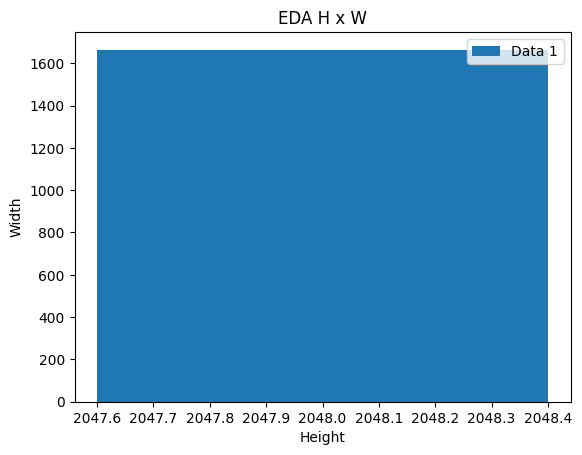

In [ ]:
import matplotlib.pyplot as plt
plt.bar(height_list,width_list, label="Data 1")
plt.legend()

# The following commands add labels to our figure.
plt.xlabel('Height')
plt.ylabel('Width')
plt.title('EDA H x W')

plt.show()

In [ ]:
list_abnormalities = glob.glob('/content/drive/MyDrive/Saigonmec/cropped/*')

In [ ]:
name_abnormalities = []
for i in list_abnormalities:
  k = i.split('_')[0].split('/')[-1]
  name_abnormalities.append(k)

In [ ]:
pd.DataFrame(name_abnormalities).value_counts()

4    1143
2     925
5     443
1     317
3     217
0      25
dtype: int64